In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# data
file_taxi_january = 'yellow_tripdata_2023-01.parquet'
file_taxi_february = 'yellow_tripdata_2023-02.parquet'

# 2021 (used in the video examples)
file_green_january = 'green_tripdata_2021-01.parquet'
file_green_february = 'green_tripdata_2021-02.parquet'

In [3]:
# create a dataframe
df = pd.read_parquet(file_green_january, engine='pyarrow')

display(df.head())

display(df.info())

print(f'\nShape: {df.shape}')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[us]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[us]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

None


Shape: (76518, 20)


(76518, 21)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58


(76518, 22)


/tmp/ipykernel_118945/3300771445.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration_minutes)


<Axes: xlabel='duration_minutes', ylabel='Density'>

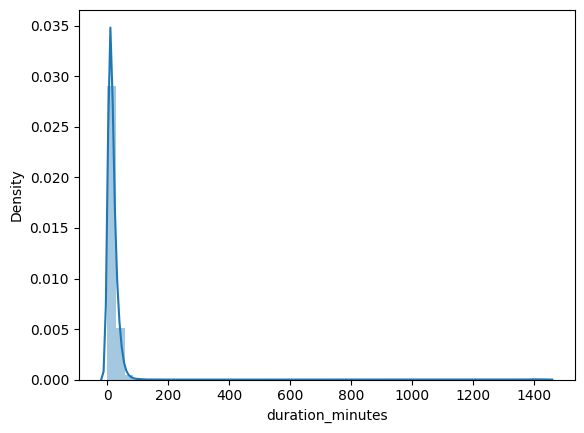

In [4]:
#df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

# take a look
print(df.shape)
display(df.head(3))

# Create a new column that represents the trip duration in minutes instead of data_time objs
df['duration_minutes'] = df.duration.apply(lambda x: x.total_seconds() / 60)
print(df.shape)
df.duration_minutes.head(2)

# visualize the distribution of trips duration
#sns.histplot(df.duration_minutes)
sns.distplot(df.duration_minutes)

In [5]:
# upper values
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df['duration_minutes'].describe(percentiles=[0.95, 0.98, 0.99, 0.998]))

# lowest values
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df['duration_minutes'].describe(percentiles=[0.01, 0.05, 0.1]))

count   76518
mean       20
std        59
min         0
50%        14
95%        44
98%        56
99%        67
99.8%     368
max      1440
Name: duration_minutes, dtype: float64
count   76518
mean       20
std        59
min         0
1%          0
5%          3
10%         5
50%        14
max      1440
Name: duration_minutes, dtype: float64


In [6]:
# lets filter out the outliers
df2 = df[(df.duration_minutes >= 1) & (df.duration_minutes <= 60)]

# take a look
print(df2.shape)
df2.head()

(73908, 22)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,duration_minutes
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.96,0.0,None,0.3,5.76,1.0,1.0,0.00,0 days 00:02:19,2.316667


/tmp/ipykernel_118945/1387199841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.duration_minutes)


<Axes: xlabel='duration_minutes', ylabel='Density'>

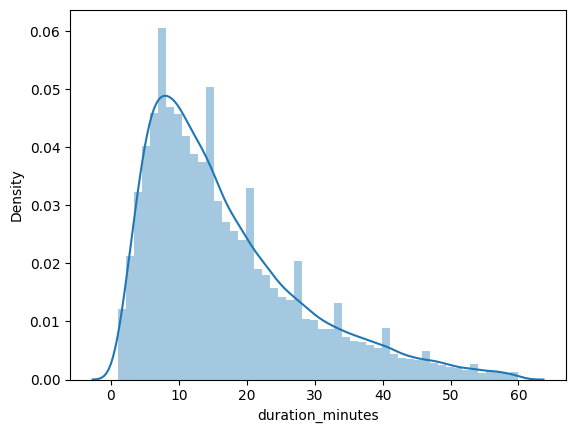

In [7]:
# visualize the new distribution
sns.distplot(df2.duration_minutes)

/tmp/ipykernel_118945/653036487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_duration_minutes'] = np.log(df2['duration_minutes'] + 1)  # Add 1 to avoid log(0) issues
/tmp/ipykernel_118945/653036487.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.log_duration_minutes)


<Axes: xlabel='log_duration_minutes', ylabel='Density'>

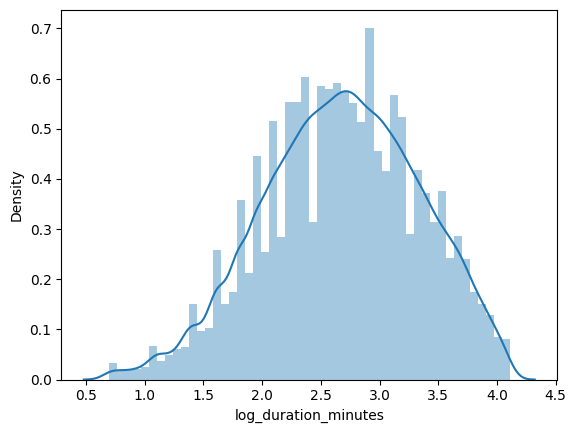

In [8]:
import numpy as np

# test logaritmic scale
df2['log_duration_minutes'] = np.log(df2['duration_minutes'] + 1)  # Add 1 to avoid log(0) issues

sns.distplot(df2.log_duration_minutes)


In [9]:
# Import DictVectorizer to do one-hot encoding to our categorical variables later
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Identify Categorical Variables
print(df2.dtypes)

# PULOcation = Pickup Location ID, DOLocation = Drop-off location ID
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# cast to String type
df2[categorical] = df2[categorical].astype(str)
df2.dtypes

VendorID                           int64
lpep_pickup_datetime      datetime64[us]
lpep_dropoff_datetime     datetime64[us]
store_and_fwd_flag                object
RatecodeID                       float64
PULocationID                       int64
DOLocationID                       int64
passenger_count                  float64
trip_distance                    float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
ehail_fee                         object
improvement_surcharge            float64
total_amount                     float64
payment_type                     float64
trip_type                        float64
congestion_surcharge             float64
duration                 timedelta64[us]
duration_minutes                 float64
log_duration_minutes             float64
dtype: object


/tmp/ipykernel_118945/978300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical] = df2[categorical].astype(str)


VendorID                           int64
lpep_pickup_datetime      datetime64[us]
lpep_dropoff_datetime     datetime64[us]
store_and_fwd_flag                object
RatecodeID                       float64
PULocationID                      object
DOLocationID                      object
passenger_count                  float64
trip_distance                    float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
ehail_fee                         object
improvement_surcharge            float64
total_amount                     float64
payment_type                     float64
trip_type                        float64
congestion_surcharge             float64
duration                 timedelta64[us]
duration_minutes                 float64
log_duration_minutes             float64
dtype: object

507


/tmp/ipykernel_118945/1716139243.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Prediction')
/tmp/ipykernel_118945/1716139243.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='Actual data')


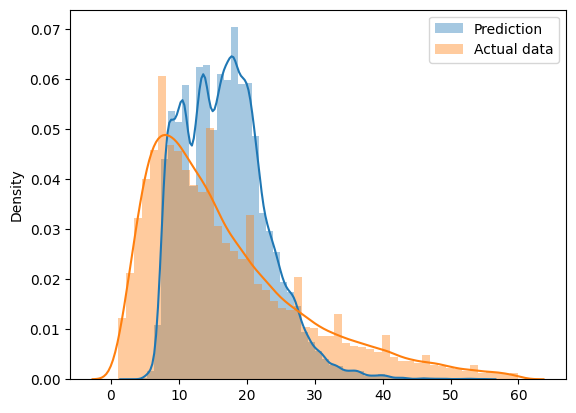

In [10]:
# Turn the DF into dictionary
train_dicts = df2[categorical + numerical] \
    .to_dict(orient='records')

# Create data to train the model
dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)

# Preview
print(len(dv.feature_names_))
dv.feature_names_[:5]

# Target variable (prediction)
target = 'duration_minutes'
# target = 'log_duration_minutes'
y_train = df2[target].values

# train the model
lr = LinearRegression()

lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_train)

# Visualize predictions against actual values


y_pred_minutes = np.exp(y_pred) - 1  # Convert back to minutes

sns.distplot(y_pred, label='Prediction')
sns.distplot(y_train, label='Actual data')

plt.legend()

In [11]:
# Error metrics
print(f'Mean Squared Error: {mean_squared_error(y_train, y_pred, squared=False)}')

# view how many NA values are in the DF
print('Null values in the complete dataframe')
df2.isna().sum()


Mean Squared Error: 9.838799799829628
Null values in the complete dataframe


/home/mrdoge/mlops_zoomcamp/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       35733
RatecodeID               35733
PULocationID                 0
DOLocationID                 0
passenger_count          35733
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                73908
improvement_surcharge        0
total_amount                 0
payment_type             35733
trip_type                35733
congestion_surcharge     35733
duration                     0
duration_minutes             0
log_duration_minutes         0
dtype: int64

/tmp/ipykernel_118945/3122092472.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Prediction')
/tmp/ipykernel_118945/3122092472.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='Actual data')


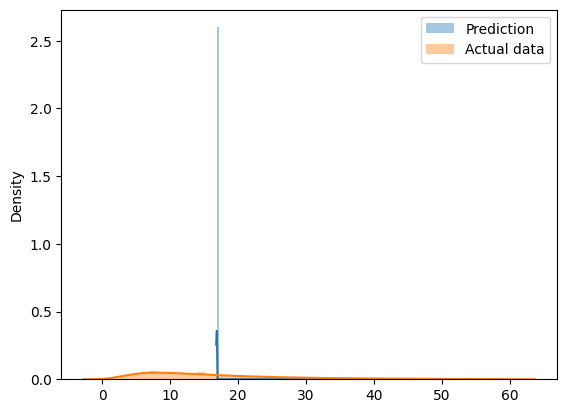

In [12]:
# Lasso
# train the model
lr = Lasso()

lr.fit(X_train, y_train)
# predict
y_pred = lr.predict(X_train)

# Visualize predictions against actual values


y_pred_minutes = np.exp(y_pred) - 1  # Convert back to minutes

sns.distplot(y_pred, label='Prediction')
sns.distplot(y_train, label='Actual data')

plt.legend()


In [13]:
# Error metrics
mean_squared_error(y_train, y_pred, squared=False)

/home/mrdoge/mlops_zoomcamp/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


11.562050466293025